# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Sklearn API: Linear and Polynomial regression models exercises

**Task**: fit Sklearn models to the simulated sample data. Evaluate goodnes of fit by quantitative metrics. Plot the input training and testing data together with the fitted model and the underlying function. 

* Exercise 1: Linear regression 

* Exercise 2: Non-linear (polynomial) regression 


"Workflow": 

1/ import needed sklearn methods:  
    `LinearRegression` from `sklearn.linear_model`
    `PolynomialFeatures` from `sklearn.preprocessing`
    `mean_squared_error` from `sklearn.metrics` 

and Matplotlib package (e.g. as plt) 

2/ Plot data 

3/ Train regression model 

4/ Evaluate model on training and testing data sets, MSE (use prediction method) 

5/ Plot the resulting model with samples scatter plot, add plot of underlying function 

6/ Evalaute the result 

In [1]:
# imports 
import numpy as np
np.random.seed(0)

# Scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Plotting 
import matplotlib.pyplot as plt
%matplotlib inline

### **Exercise 1:** Linear regression in Sklearn
* Use **`LinearRegression`** model from `sklearn.linear_model`


In [104]:
 # DATA

In [2]:
# Process function 
def fun(x, noise):
    return .6 *  x + (x ** .8) * noise

In [3]:
# Sample training data (simulated) 
n_samples = 20
noise_factor = 0.9
# features
X_train = np.sort(np.random.rand(n_samples))

# targets (references) 
noise_train = np.random.rand(n_samples) * noise_factor
y_train = fun(X_train, noise_train) 
X_train = X_train.reshape(-1, 1)

# Sample testing data from the same underlying function 
n_samples_test = 20
# testin gfeatures
X_test = np.sort(np.random.rand(n_samples_test))

# testing targets 
noise_test = np.random.rand(n_samples_test) * noise_factor
y_test = fun(X_test, noise_test)
X_test = X_test.reshape(-1, 1)

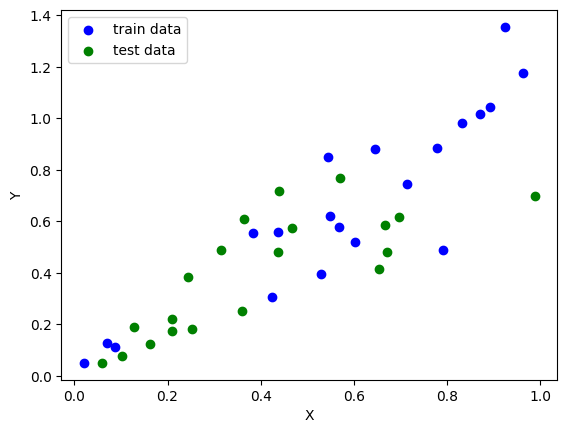

In [4]:
# Plot scatterplots (train and test data with different color), add legend and mark axess
plt.scatter(X_train, y_train, c="b")
plt.scatter(X_test, y_test, c="g")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["train data", "test data"], loc="best")

### Train linear regression model

In [9]:
# instantiate model
model = LinearRegression()
# fit model on tarining data 
model.fit(X_train, y_train) 

LinearRegression()

In [10]:
# You can check the model parameters 
model.fit_intercept

True

In [11]:
model.coef_

array([1.14988114])

In [12]:
model.intercept_

-0.006760181988206382

In [13]:
# Evaluate model MSE on training data, use model prediction, print the result
train_pred = model.predict(X_train)
MSE_train = mean_squared_error(y_train, train_pred)
print(f"MSE train: {round(MSE_train, 3)}")

MSE train: 0.024


In [15]:
# Evaluate model on testing data, use model prediction, print the result
test_pred = model.predict(X_test)
MSE_test = mean_squared_error(y_test, test_pred) 
print(f"MSE test: {round(MSE_test, 3)}")

MSE test: 0.031


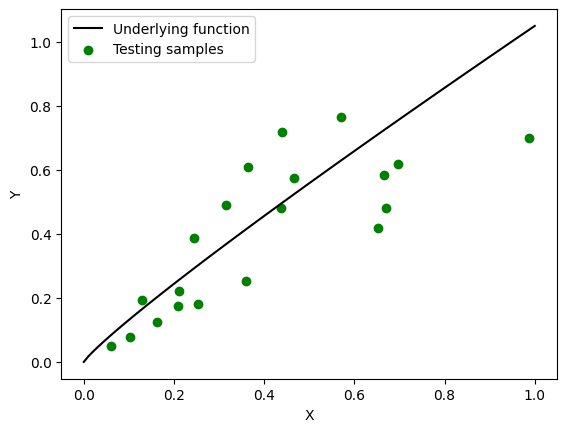

In [17]:
# Plot the linear model with samples scatter plot, add underlying function (X_fun and y_fun)

X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

plt.plot(X_fun, y_fun, color="k",  label="Underlying function")
plt.scatter(X_test, y_test, c="g", label="Testing samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best")
 

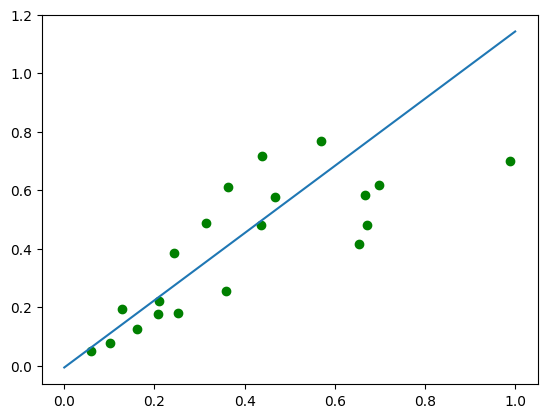

In [18]:
y_fun_pred = model.predict(X_fun.reshape(-1,1))
plt.plot(X_fun,y_fun_pred)
plt.scatter(X_test, y_test, c="g", label="Testing samples")

### **Exercise 2:** Non-linear (polynomial) regression in Sklearn

* Use **`LinearRegression`** model from `sklearn.linear_model`. 
* Transform the input features by **`PolynomialFeatures`** from `sklearn.preprocessing`. Use `fit_transform` method. 


In [19]:
# Sample data
def fun(x, noise):
    return .6 * np.sin(x*6) + x + (x ** .8) * noise

In [20]:
# Sample training data (simulated) 
n_samples = 20
noise_factor = 0.7
# features
X_train = np.sort(np.random.rand(n_samples))

# targets (references) 
noise_train = np.random.rand(n_samples) * noise_factor
y_train = fun(X_train, noise_train) 
X_train = X_train.reshape(-1, 1)

# Sample testing data from the same underlying function 
n_samples_test = 20
# testin gfeatures
X_test = np.sort(np.random.rand(n_samples_test))

# testing targets 
noise_test = np.random.rand(n_samples_test) * noise_factor
y_test = fun(X_test, noise_test)
X_test = X_test.reshape(-1, 1)

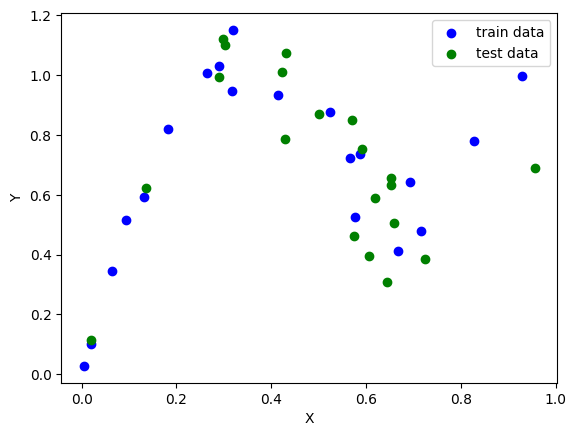

In [21]:
# Plot scatterplot (train and test data with different color), add legend 
plt.scatter(X_train, y_train, c="b", label="train data")
plt.scatter(X_test, y_test, c="g", label="test data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best")

In [23]:
# Transform input data to polynomials
degree = 10
# instantiate
poly = PolynomialFeatures(degree=degree, include_bias=False) 
# fit_transform
polynomial_features = poly.fit_transform(X_train.reshape(-1,1))

In [24]:
# instantiate linear regression model 
linear_regression = LinearRegression()
# fit the model 
linear_regression.fit(polynomial_features, y_train) 

LinearRegression()

In [25]:
# Evaluate: predict (use the polynomial transform data!) for model evaluation
train_pred = linear_regression.predict(polynomial_features)
MSE_train = mean_squared_error(y_train, train_pred)
print(f"MSE train: {round(MSE_train, 3)}")


MSE train: 0.005


In [27]:
# Evaluate the model on test subset
test_features = poly.fit_transform(X_test)
test_pred = linear_regression.predict(test_features)
MSE_test = mean_squared_error(y_test, test_pred) 
print(f"MSE test: {round(MSE_test, 3)}")

MSE test: 0.384


(0.0, 2.0)

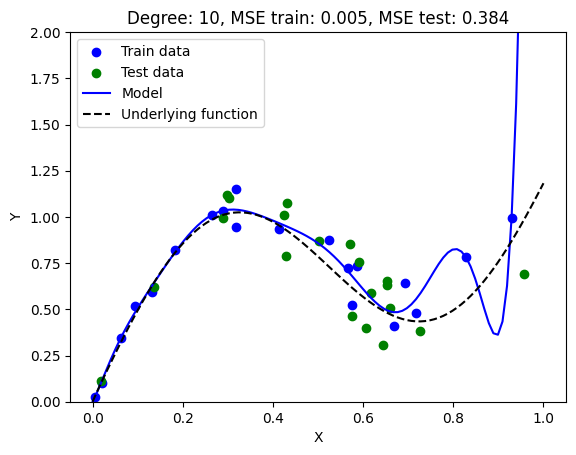

In [29]:
# Plot the input data together with the model and underlying function 

# Model data
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly.fit_transform(X_plot.reshape(-1, 1))
y_plot = linear_regression.predict(plot_polynomial_features)

# Underlying function data
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

plt.scatter(X_train, y_train, c="b", label="Train data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.plot(X_plot, y_plot, color="b", label="Model")
plt.plot(X_fun, y_fun, "k--", label="Underlying function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best")
plt.title(f"Degree: {degree}, MSE train: {round(MSE_train, 3)}, MSE test: {round(MSE_test, 3)}")
plt.ylim(0,2)

